# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

File ‘f150_motor_distributors.txt’ already there; not retrieving.



In [163]:
print(all_data)

[[-11.96999577  -8.03962819]
 [-26.96141582  -6.96210943]
 [-12.91584891  -1.37894148]
 ...
 [ 12.92550271  -0.10319682]
 [-34.33677838   4.4057531 ]
 [-26.81273855  -1.63995599]]


In [164]:
def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):

  for _ in range(num_iterations):
    # distances from data points to centroids
    distance = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    # each data point to the closest centroid
    classes = np.argmin(distance, axis=1)
    # update the centroids
    updated_centroids = np.array([data[classes == i].mean(axis=0) for i in range(len(centroids))])
    # if centroid did not update
    if np.array_equal(centroids, updated_centroids):
      break

    centroids = updated_centroids

  return centroids, classes

In [165]:
def plot_data(data, centroids, classes):
  for cluster_label in np.unique(classes):
    plt.scatter(data[classes == cluster_label, 0], data[classes == cluster_label, 1], label=f'Cluster {cluster_label}')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')

  plt.legend()
  plt.title('K-means Clustering Results')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.show()
  return

Centroids:
[[ 27.26677403  -1.08848482]
 [-32.27032272   2.65984149]
 [ -1.45401192  -2.23932918]
 [ 11.48737759  -1.70898344]
 [-15.05895772  -0.47281415]]
Classes:
[4 1 4 ... 3 1 1]


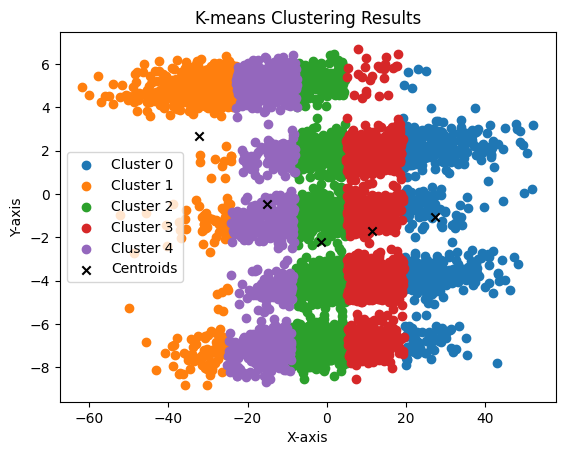

In [166]:
use_P = False #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster(all_data, centroids_, P = P_ )
print("Centroids:")
print(centroids_)
print("Classes:")
print(classes_)
plot_data(all_data, centroids_, classes_)


# Mahalanobis Distance with specialized covariance

## 5. Implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors. What do you notice? You may want to pre- compute P −1 so that you aren’t calculating an inverse every single loop of the the k-Means algorithm.

In [167]:
def inverse_matrix(P):
 return np.linalg.inv(P.T.dot(P))

use_P = True

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

print("Original Matrix: ")
print(P_)
print("Transpose Matrix:")
print(P_.T)
print("Transpose matrix dot P:")
print(P_.T.dot(P_))
print("Inverse Matrix: ")
print(inverse_matrix(P_))

Original Matrix: 
[[ 10.     0.5 ]
 [-10.     0.25]]
Transpose Matrix:
[[ 10.   -10.  ]
 [  0.5    0.25]]
Transpose matrix dot P:
[[200.       2.5   ]
 [  2.5      0.3125]]
Inverse Matrix: 
[[ 0.00555556 -0.04444444]
 [-0.04444444  3.55555556]]


In [168]:
def mahalanobis_distance(x, y, P):
  delta = x - y
  return delta.T.dot(inverse_matrix(P_)).dot(delta)

In [169]:
def kmeans_mahalanobis(data, centroids, P, num_iterations=100):
  classes = np.zeros(len(data), dtype=int)

  for _ in range(num_iterations):
    for i in range(len(data)):
      distances = [mahalanobis_distance(data[i], c, P) for c in centroids]
      classes[i] = np.argmin(distances)
    updated_centroids = np.array([data[classes == i].mean(axis=0) for i in range(len(centroids))])

    if np.array_equal(centroids, updated_centroids):
      break

    centroids = updated_centroids
  return centroids, classes

Centroids:
[[-20.40310599   5.00655283]
 [ -3.24764066  -7.01766444]
 [ -1.09670369  -0.9992032 ]
 [  9.97451285   2.00207148]
 [  8.71408722  -4.00981947]]
Classes:
[1 1 2 ... 2 0 2]


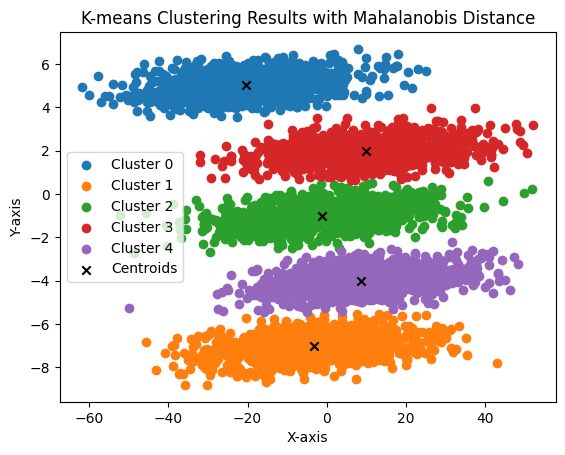

In [170]:
initial_centroids = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

use_P = True

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

centroids, classes = kmeans_mahalanobis(all_data, initial_centroids, P=P_)

for label in np.unique(classes):
  plt.scatter(all_data[classes == label, 0], all_data[classes == label, 1], label=f'Cluster {label}')

print("Centroids:")
print(centroids)
print("Classes:")
print(classes)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')
plt.legend()
plt.title('K-means Clustering Results with Mahalanobis Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## 6. Calculate and print out the first principle component of the aggregate data.

In [171]:
def first_principal_component_aggregate_data(data):
  # Compute the covariance matrix
  covariance_matrix = np.cov(all_data.T)

  # Perform eigendecomposition of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

  # Sort eigenvalues and eigenvectors in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  # in first PCA we consider the largest eigenvalue
  return eigenvectors[:, 0], eigenvalues, eigenvectors

# Print the first principal component
print("First Principal Component of Aggregate Data:")
print(first_principal_component_aggregate_data(all_data)[0])

First Principal Component of Aggregate Data:
[ 0.99838317 -0.05684225]


In [172]:
def plot_aggregated_clusters(data, eigenvalues, eigenvectors):
    # Plot the 2D data
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1])
    plt.quiver(eigenvalues, eigenvectors)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Aggregated Clusters")
    plt.show()

## 7. Calculate and print out the first principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

In [173]:
def first_principal_component_each_cluster(data):

  cluster_components = []

  for cluster_label in np.unique(classes):

    # Extract data points belonging to the current cluster
    cluster_data = all_data[classes == cluster_label]

    # Compute the covariance matrix for the cluster data
    covariance_matrix_cluster = np.cov(cluster_data.T)

    # Perform eigendecomposition of the cluster's covariance matrix
    eigenvalues_cluster, eigenvectors_cluster = np.linalg.eig(covariance_matrix_cluster)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices_cluster = np.argsort(eigenvalues_cluster)[::-1]
    eigenvalues_cluster = eigenvalues_cluster[sorted_indices_cluster]
    eigenvectors_cluster = eigenvectors_cluster[:, sorted_indices_cluster]

    # in first PCA we consider the largest eigenvalue
    first_principal_component_cluster = eigenvectors_cluster[:, 0]

    cluster_components.append(first_principal_component_cluster)

  return cluster_components, eigenvalues, eigenvectors

aggregated_clusters = first_principal_component_aggregate_data(all_data)[0]
print("First principal component of aggregated data:\n", aggregated_clusters)
cluster_components = first_principal_component_each_cluster(all_data)[0]
for i, cluster_label in enumerate(cluster_components):
  # Print the first principal component of the current cluster
  print(f"First Principal Component of Cluster {i}:")
  print(cluster_label)

# Check if the first principal components are the same as the aggregate data
for i, cluster_pc in enumerate(cluster_components):
  rounded_cluster = np.round(cluster_pc, 3)
  rounded_aggregated = np.round(aggregated_clusters, 3)
  if np.allclose(rounded_cluster, rounded_aggregated):
    print(f"First Principal Component of Cluster {i} is the same as the Aggregate Data.")

# Check if the first principal components of clusters are the same as each other
for i in range(len(cluster_components) - 1):
    for j in range(i + 1, len(cluster_components)):
      rounded_cluster_i = np.round(cluster_components[i], 3)
      rounded_cluster_j = np.round(cluster_components[j], 3)
      if np.allclose(rounded_cluster_i, rounded_cluster_j):
        print(f"First Principal Component of Cluster {i} is the same as Cluster {j}.")


First principal component of aggregated data:
 [ 0.99838317 -0.05684225]
First Principal Component of Cluster 0:
[0.99993527 0.01137789]
First Principal Component of Cluster 1:
[0.99992533 0.01222027]
First Principal Component of Cluster 2:
[0.99990986 0.01342629]
First Principal Component of Cluster 3:
[0.99993306 0.01157047]
First Principal Component of Cluster 4:
[0.99989374 0.01457781]
First Principal Component of Cluster 1 is the same as Cluster 3.


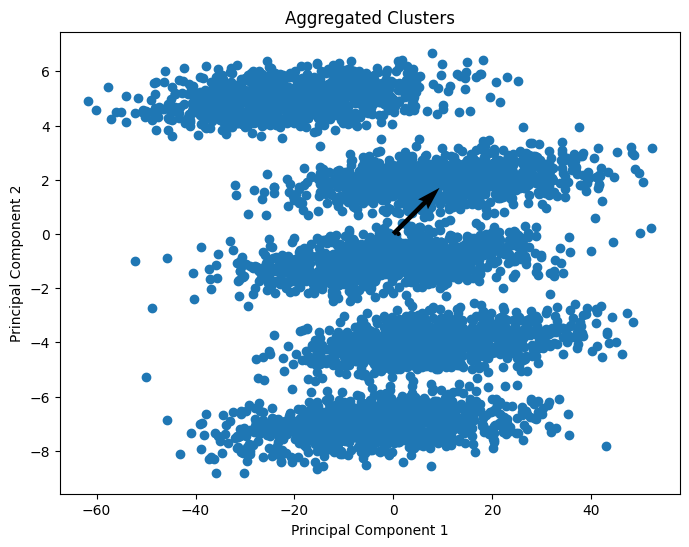

In [174]:
# Call the function to plot the aggregated clusters
plot_aggregated_clusters(all_data, first_principal_component_aggregate_data(all_data)[-1][0], first_principal_component_aggregate_data(all_data)[-1][0])

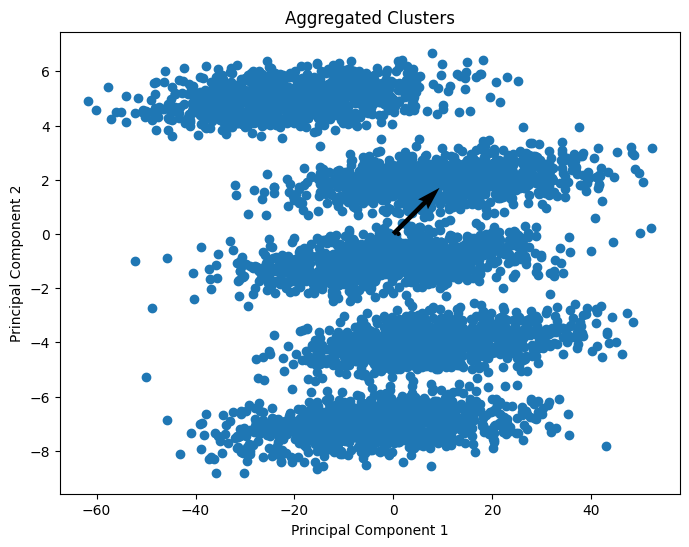

In [175]:
plot_aggregated_clusters(all_data, first_principal_component_each_cluster(all_data)[-1][0], first_principal_component_each_cluster(all_data)[-1][0])

They are similar with the aggregated data.